## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data[['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Length_of_current_employment', 'Most_valuable_available_asset']].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

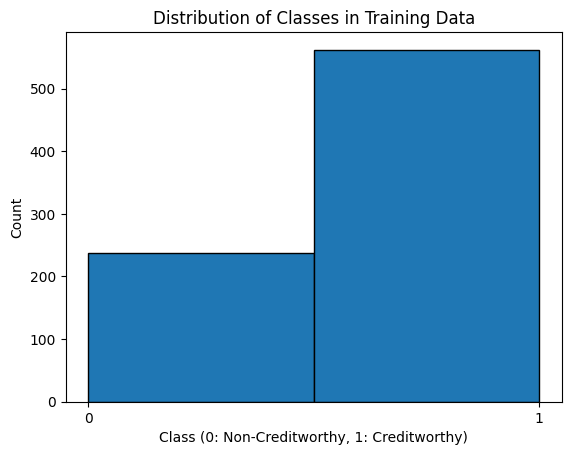

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
print(rf_model)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

RandomForestClassifier(random_state=42)
Random Forest метрики:
ROC AUC: 0.64
Accuracy: 0.71
Precision: 0.77
Recall: 0.82

Gradient Boosting метрики:
ROC AUC: 0.64
Accuracy: 0.72
Precision: 0.76
Recall: 0.87


In [5]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(1, 1, 1, 1), max_iter=400, random_state=42, activation = "tanh")
mlp_model.fit(X_train, y_train)
# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:,1])
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.80
Accuracy: 0.69
Precision: 0.69
Recall: 1.00


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

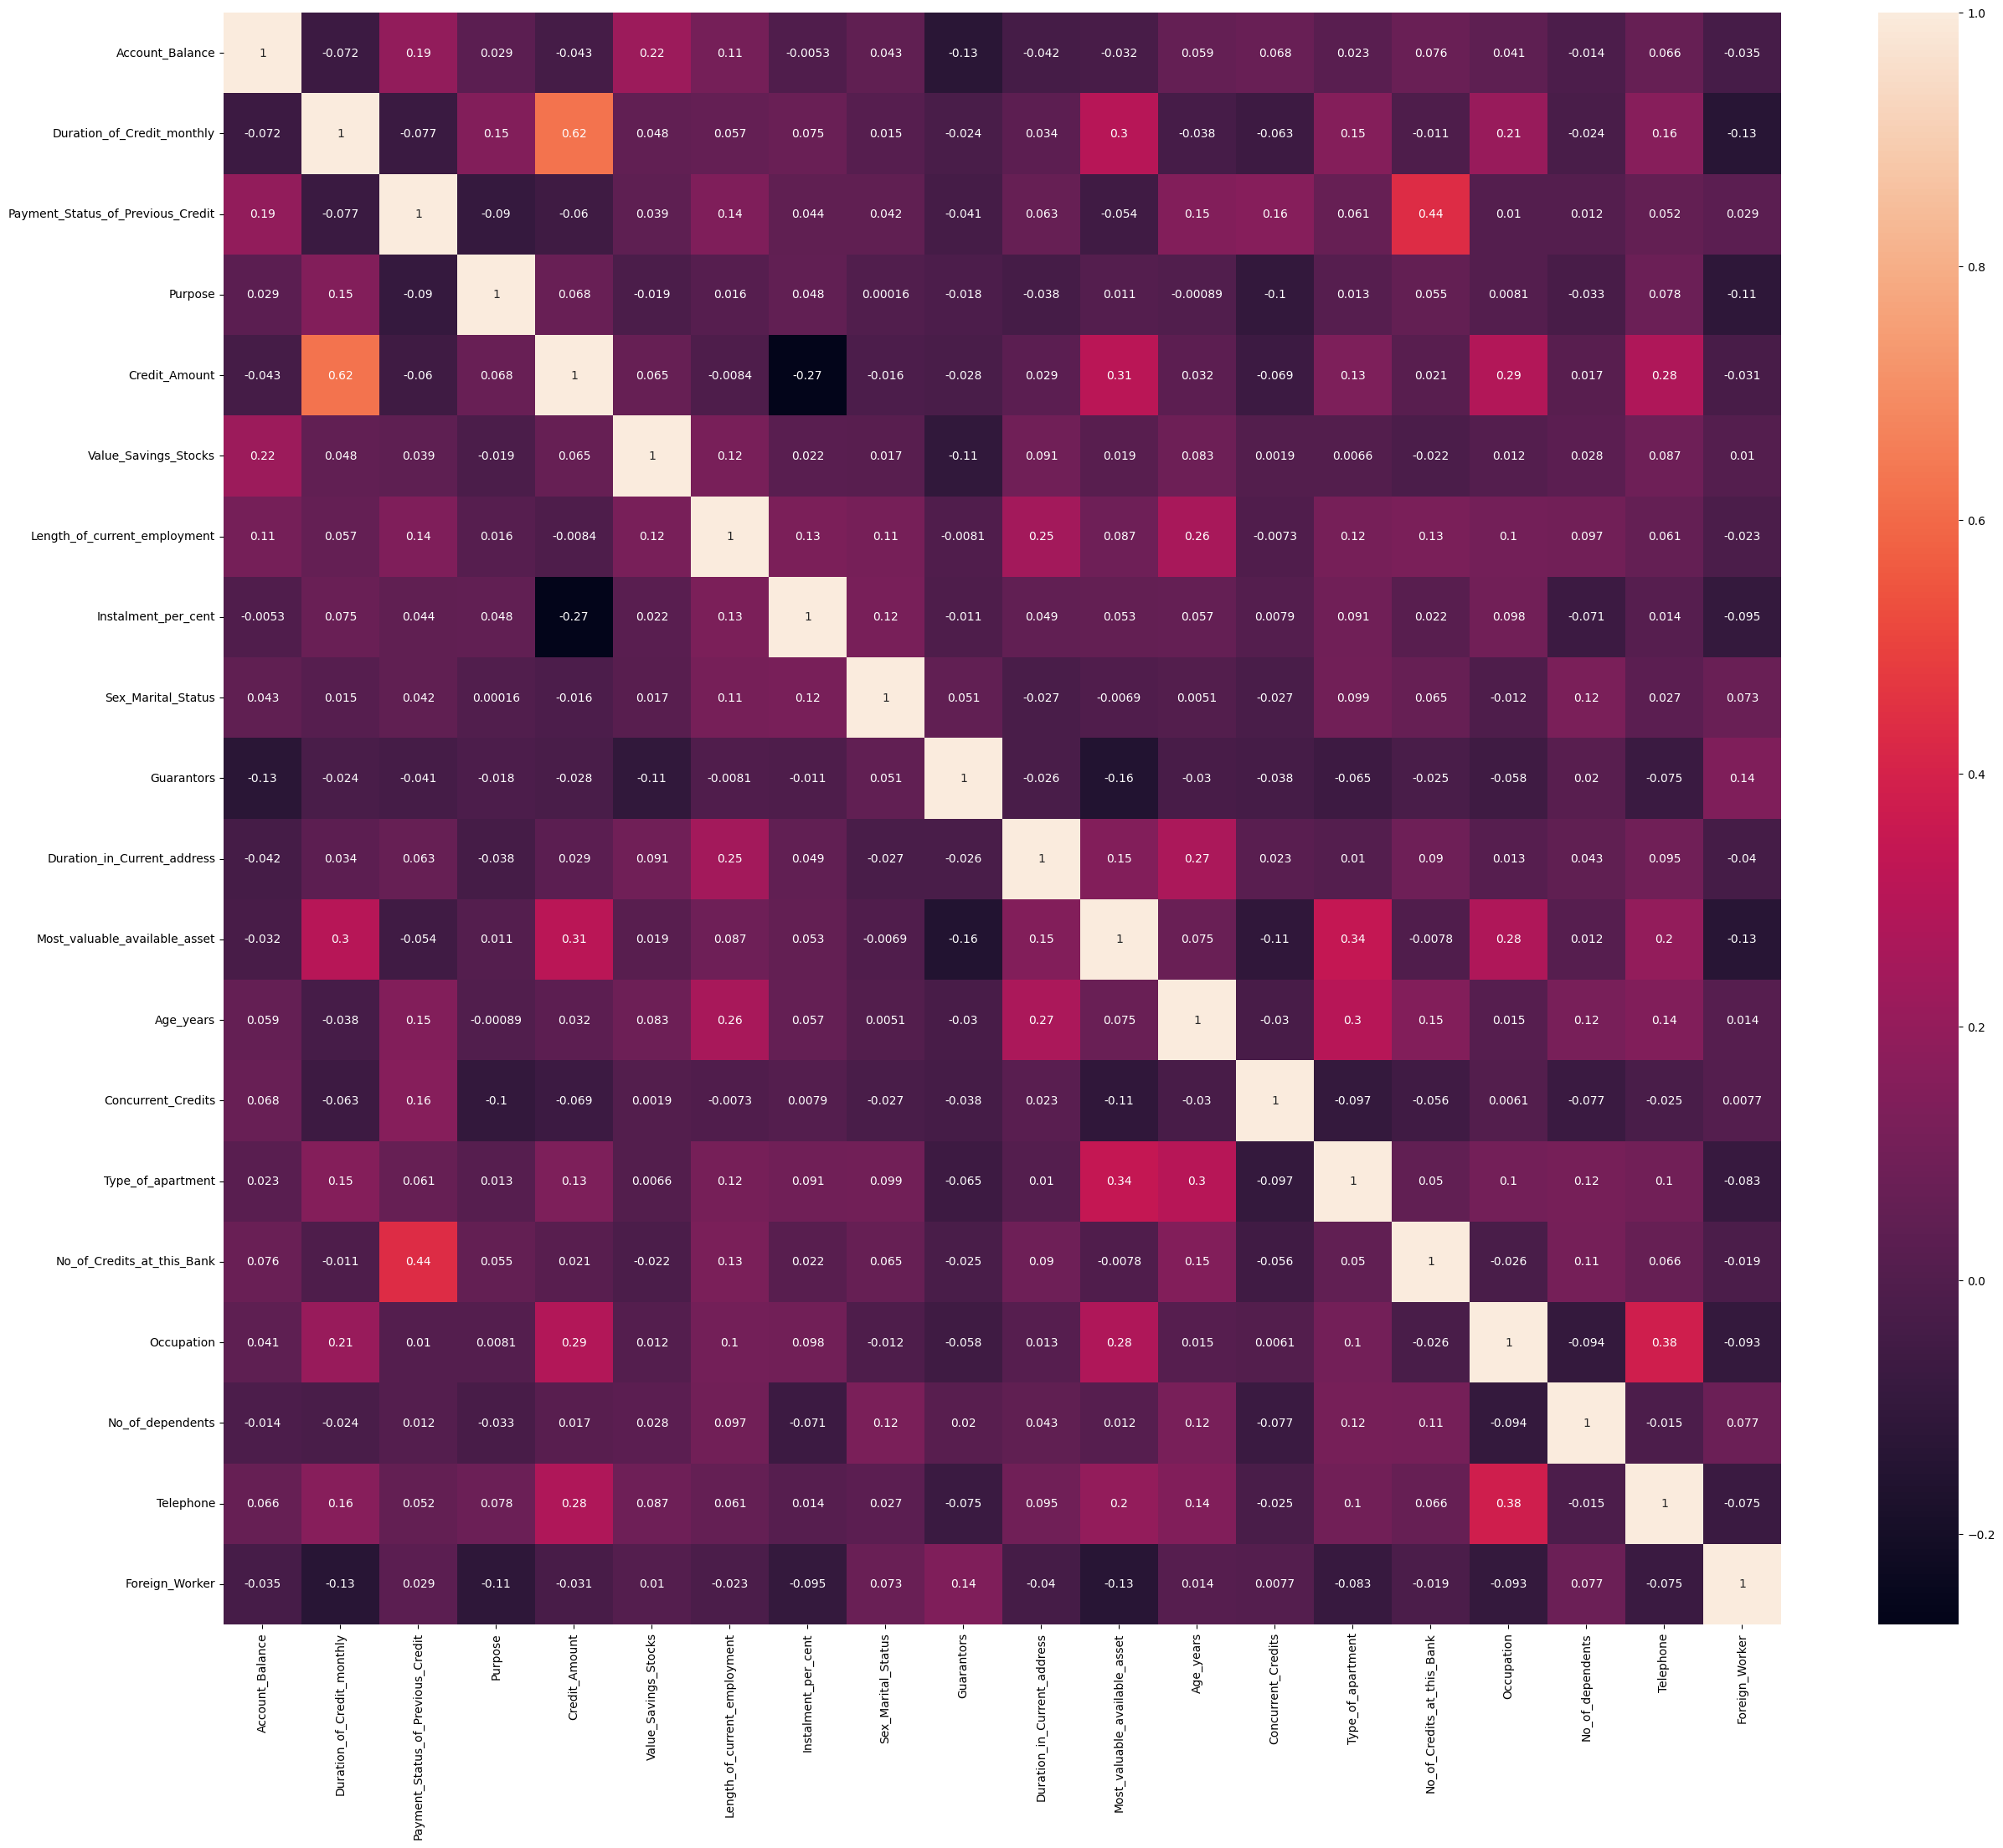

In [6]:
import seaborn as sns
myBestCorr=open("Коллеряция.txt", 'w')
corrdata = data.iloc[:, 1:]
corrdatahotmap = corrdata.corr(numeric_only=True)
myBestCorr.write(str(corrdatahotmap))
plt.figure(figsize = (30, 25))
sns.heatmap(corrdatahotmap, annot = True)
myBestCorr.close()

In [7]:
# import itertools as it
# import warnings
# import threading
# import time

# warnings.filterwarnings("ignore")
# maxRocAuc = 0
# lock = threading.Lock()

# def train_mlp(neurons, activs, iters, name):
#     global maxRocAuc
#     global X
#     global y
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     for neuron in it.product(neurons[0], repeat=neurons[1]):
#         for activ in activs:
#             for iter in iters:
#                 mlp_model = MLPClassifier(hidden_layer_sizes=neuron, max_iter=iter, random_state=42, activation=activ)
#                 mlp_model.fit(X_train, y_train)

#                 mlp_pred = mlp_model.predict_proba(X_test)[:, 1]

#                 thisRocAuc = roc_auc_score(y_test, mlp_pred)

#                 with lock:
#                     if thisRocAuc > maxRocAuc:
#                         maxRocAuc = thisRocAuc
#                         nado = iter
#                         print(f"Максимальное значение Roc_Auc: {maxRocAuc}")
#                         print(f"На итерации: {iter}")
#                         print(f"При скрытых нейронах: {neuron}")
#                         print(f"При активации: {activ}")
#                         print(f"В потоке номер: {name}")

#                 # if maxRocAuc >= 0.80:
#                 #     return

# # Создаем списки задач и потоков
# neurons1 = [[2**i for i in range(11)], 4]
# neurons2 = [range(2, 150, 2), 4]
# neurons3 = [[2**i for i in range(11)], 2]
# neurons4 = [range(2, 150, 2), 2]
# neurons5 = [range(2, 300), 2]
# neurons6 = [range(2, 300, 2), 4]

# activs = ["identity", "logistic", "tanh", "relu"]
# iters = list(range(25, 501, 25))
# iters1 = list(range(5, 501, 5))
# iters2 = list(range(2,500,2))

# # Создаем и запускаем потоки с задержкой
# thread1 = threading.Thread(target=train_mlp, args=(neurons1, activs, iters, 1))
# thread2 = threading.Thread(target=train_mlp, args=(neurons2, activs, iters1, 2))
# thread3 = threading.Thread(target=train_mlp, args=(neurons3, activs, iters, 3))
# thread4 = threading.Thread(target=train_mlp, args=(neurons4, activs, iters1, 4))
# thread5 = threading.Thread(target=train_mlp, args=(neurons5, activs, iters2, 5))
# thread6 = threading.Thread(target=train_mlp, args=(neurons6, activs, iters2, 6))


# thread1.start()
# time.sleep(2)  # Задержка между запусками потоков
# thread2.start()
# time.sleep(2)
# thread3.start()
# time.sleep(2)
# thread4.start()
# time.sleep(2)
# thread5.start()
# time.sleep(2)
# thread6.start()

# # Дожидаемся завершения всех потоков
# thread1.join()
# thread2.join()
# thread3.join()
# thread4.join()
# thread5.join()
# thread6.join()


In [8]:
# import itertools as it
# import warnings
# import threading
# import time

# warnings.filterwarnings("ignore")
# maxRocAuc = 0


# lock = threading.Lock()

# def train_mlp(y, neurons, activs, iters, name, numpar):
#     global maxRocAuc

#     s="Account_Balance;Duration_of_Credit_monthly;Payment_Status_of_Previous_Credit;Purpose;Credit_Amount;Value_Savings_Stocks;Length_of_current_employment;Instalment_per_cent;Sex_Marital_Status;Guarantors;Duration_in_Current_address;Most_valuable_available_asset;Age_years;Concurrent_Credits;Type_of_apartment;No_of_Credits_at_this_Bank;Occupation;No_of_dependents;Telephone;Foreign_Worker"
#     z = s.split(";")
#     W=[]
#     W.extend(list(it.combinations(z,numpar)))
#     for dataframe in W:
#         X = data[list(dataframe)].to_numpy()
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#         for neuron in it.product(neurons[0], repeat=neurons[1]):
#             for activ in activs:
#                 for iter in iters:
#                     mlp_model = MLPClassifier(hidden_layer_sizes=neuron, max_iter=iter, random_state=42, activation=activ)
#                     mlp_model.fit(X_train, y_train)

#                     mlp_pred = mlp_model.predict_proba(X_test)[:, 1]

#                     thisRocAuc = roc_auc_score(y_test, mlp_pred)

#                     with lock:
#                         if thisRocAuc > maxRocAuc:
#                             maxRocAuc = thisRocAuc
#                             nado = iter
#                             print(f"\nНа итерации: {iter}")
#                             print(f"При скрытых нейронах: {neuron}")
#                             print(f"При активации: {activ}")
#                             print(f"При данных: {dataframe}")
#                             print(f"Максимальное значение Roc_Auc: {maxRocAuc}")
#                             print(f"В потоке: {name}\n")
#                     # if maxRocAuc >= 0.80:
#                     #     return

# # Создаем списки задач и потоков
# neurons1 = [[2**i for i in range(11)], 4]
# activs = ["identity", "logistic", "tanh", "relu"]
# iters = list(range(25, 501, 25))
# potokov = 8
# # Создаем и запускаем потоки с задержкой
# Thread = [threading.Thread(target=train_mlp, args=(y, neurons1, activs, iters, i+1,i+2)) for i in range(potokov)]

# for i in range(potokov):
#     Thread[i].start()
#     time.sleep(2)

# # Дожидаемся завершения всех потоков
# for i in range(potokov):
#     Thread[i].join()



Поработаем с Pikle

In [9]:
import itertools as it
import warnings
import threading
import time

warnings.filterwarnings("ignore")
maxRocAuc = 0
SuccessfulModelsDumps = [0 for i in range(4)]

lock = threading.Lock()

f = open("SuccessfulModelsDump.pickle", "wb")


def train_mlp(y, neurons, activs, iters, name, numpar, testModel):
    maxRocAuc = 0
    countss = 0
    SuccessfulModels = [0] * testModel
    Datas = [0] * numpar
    global f
    global SuccessfulModelsDumps
    s="Account_Balance;Duration_of_Credit_monthly;Payment_Status_of_Previous_Credit;Purpose;Credit_Amount;Value_Savings_Stocks;Length_of_current_employment;Instalment_per_cent;Sex_Marital_Status;Guarantors;Duration_in_Current_address;Most_valuable_available_asset;Age_years;Concurrent_Credits;Type_of_apartment;No_of_Credits_at_this_Bank;Occupation;No_of_dependents;Telephone;Foreign_Worker"
    z = s.split(";")
    W=[]
    W.extend(list(it.combinations(z,numpar)))
    for dataframe in W:
        X = data[list(dataframe)].to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        for neuron in it.product(neurons[0], repeat=neurons[1]):
            for activ in activs:
                for iter in iters:
                    mlp_model = MLPClassifier(hidden_layer_sizes=neuron, max_iter=iter, random_state=42, activation=activ)
                    mlp_model.fit(X_train, y_train)
                    mlp_pred = mlp_model.predict_proba(X_test)[:, 1]
                    thisRocAuc = roc_auc_score(y_test, mlp_pred)
                    if thisRocAuc >= 0.78:
                        Datas = list(dataframe)
                        SuccessfulModels[countss] = [pickle.dumps(mlp_model), dataframe]
                        countss+=1
                        print(f"\nНа итерации: {iter}")
                        print(f"При скрытых нейронах: {neuron}")
                        print(f"При активации: {activ}")
                        print(f"При данных: {dataframe}")
                        print(f"Текущий значение Roc_Auc: {thisRocAuc}")
                        print(f"По счёту: {countss}")
                        print(f"В потоке: {name}\n")
                        pickle.dump({"Model": [pickle.dumps(mlp_model), dataframe]}, f)
                    if ProverkaMagic(Datas, list(dataframe)):
                        break
                if ProverkaMagic(Datas, list(dataframe)):
                    break
            if ProverkaMagic(Datas, list(dataframe)):
                    break
        if countss == testModel:
            SuccessfulModelsDumps[name] = SuccessfulModels
            return


def assemblyResponse(data, y, potokov, testModel, SuccessfulModelsDumps):
    Z = np.zeros(len(data[list(SuccessfulModelsDumps[1][0][1])]["Account_Balance"])//5)
    
    for i in range(potokov):
        for j in range(testModel):
            SuccessfulModels = pickle.loads(SuccessfulModelsDumps[i+1][j][0])
            X = data[list(SuccessfulModelsDumps[i+1][j][1])].to_numpy()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            Z += SuccessfulModels.predict_proba(X_test)[:, 1]
    
    Z /= (potokov * testModel)
    
    roc_auc = roc_auc_score(y_test, Z)
    print("ROC AUC:", roc_auc)

def ProverkaMagic(Array1, Array2):
    z=0
    c=len(Array2)
    for i in range(c):
        if Array1[i] == Array2[i]:
            z+=1
    return z / c > 0.5


# Создаем списки задач и потоков
neurons1 =  [[2**i for i in range(5)], 2]#[[2**i for i in range(11)], 4]
activs = ["identity", "logistic", "tanh", "relu"]
iters = [250,200,150,100]#list(range(25, 251, 25))
potokov = 3
testModel = 4
# Создаем и запускаем потоки с задержкой
Thread = [threading.Thread(target=train_mlp, args=(y, neurons1, activs, iters, i+1,i+3, testModel)) for i in range(potokov)]

for i in range(potokov):
    Thread[i].start()
    time.sleep(2)

# Дожидаемся завершения всех потоков
for i in range(potokov):
    Thread[i].join()
f.close()
print("Гречка")

assemblyResponse(data, y, potokov, testModel, SuccessfulModelsDumps)





На итерации: 100
При скрытых нейронах: (1, 2)
При активации: logistic
При данных: ('Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit')
Текущий значение Roc_Auc: 0.7833683964469378
По счёту: 1
В потоке: 1

